**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [5]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
from   scipy import optimize
import sympy as sm
import Q1 as q1

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from types import SimpleNamespace
from copy import deepcopy
import ipywidgets as widgets
from sympy import symbols, Eq, sqrt, N, lambdify, simplify

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [6]:
# A. Define the symbols
C, L, G, kappa, w, tau, w_disp, nu, alpha, V = sm.symbols('C L G kappa w tau w̃ nu alpha V') 
#display(C, L, G, kappa, w, tau, w_disp, nu, alpha, V) # check everything looks okay

# B. Defining objective function, variables and constraints (inserting consumption constraint in to utility)
G_con = sm.And(G > 1, G < 2) # Currently uninitialized
utility = sm.Eq(V, sm.ln((kappa + w_disp*L)**alpha*G**(1-alpha))-nu*L**2/2)

# Displaying
print(f'The consolodated objective function is:')
display(utility)

# C. Finding the FOC wrt L
FOC        = sm.diff(utility.rhs, L)

# Displaying
print(f'The FOC of {V} wrt {L} is:')
display(sm.Eq(sm.diff(V, L), FOC))

# D. Solving for L 
sol = sm.solve(FOC, L)

# Displaying solutions:
print('Solutions for L:')
for i, solution in enumerate(sol):
    print(f'Solution {i+1}:')
    display(solution)

# E. Numeric solutions for L and verification that G is within the bound:
# Define parameter values
param_values = {
    alpha: 0.5,
    kappa: 1.0,
    nu: 1/(2 * 16**2),
    w: 1.0, 
    tau: 0.3,
    w_disp: (1-0.3)*1,
}

# Use only solution for which L > 0 and G is within the bound
print('Numeric solutions for L and verification that G is within the bound:')
for i, solution in enumerate(sol):
    # Substitute parameter values into the solution for L
    solution_evaluated = solution.subs(param_values)
    # Evaluate the solution
    result = solution_evaluated.evalf()
    solution_G = utility.rhs.subs({L: solution_evaluated, w_disp: (1-tau)*w})  # Updating w_disp expression
    # Display the numeric solution
    print(f'Numeric solution {i+1} is: (L_{i+1}= {result:.2f})')
    # Check if the result is greater than zero and G is within the bound and print
    if result > 0:
        if G_con.subs(G, solution_G):
            print(f'Positive solution for supplied labor is: L = {result:.2f}')
            print(f'G is between 1 and 2 for this solution.')
            print(f'Solution to the problem as seen in the Problem Statement is:')
            solution_eq = sm.Eq(L, sol[i])  # Update solution_eq
            display(solution_eq)
        else:
            print(f'G is not between 1 and 2 for this solution.')

The consolodated objective function is:


Eq(V, -L**2*nu/2 + log(G**(1 - alpha)*(L*w̃ + kappa)**alpha))

The FOC of V wrt L is:


Eq(0, G**(1 - alpha)*G**(alpha - 1)*alpha*w̃/(L*w̃ + kappa) - L*nu)

Solutions for L:
Solution 1:


(-kappa*nu - sqrt(nu*(4*alpha*w̃**2 + kappa**2*nu)))/(2*nu*w̃)

Solution 2:


(-kappa*nu + sqrt(nu*(4*alpha*w̃**2 + kappa**2*nu)))/(2*nu*w̃)

Numeric solutions for L and verification that G is within the bound:
Numeric solution 1 is: (L_1= -16.73)
Numeric solution 2 is: (L_2= 15.30)
Positive solution for supplied labor is: L = 15.30
G is between 1 and 2 for this solution.
Solution to the problem as seen in the Problem Statement is:


Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w̃**2 + kappa**2*nu)))/(2*nu*w̃))

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

Solution expressed in terms of disposable income


Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w̃**2 + kappa**2*nu)))/(2*nu*w̃))

Solution expressed in terms of gross income and tax rate


Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)))/(2*nu*w*(1 - tau)))

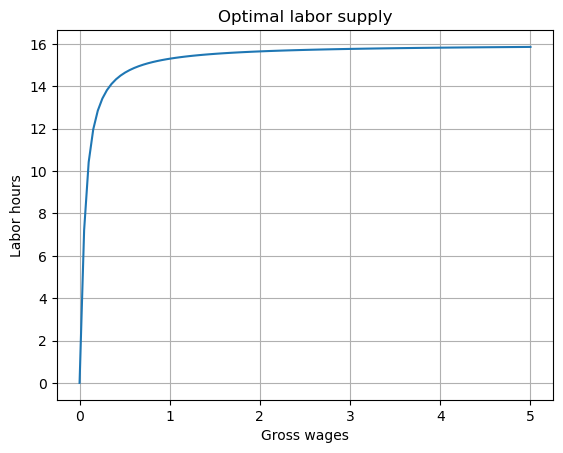

In [7]:
# Displaying the expression for our preferred solution
print(f'Solution expressed in terms of disposable income')
display(solution_eq)

# Updating wage expression 
solution_eq = solution_eq.subs(w_disp, (1-tau)*w)
print(f'Solution expressed in terms of gross income and tax rate')
display(solution_eq)

# Define the range of values for w
w_values = np.linspace(1e-08, 5, 100)

# Define the equation for L as a function of w
L_values = [N(solution_eq.subs({**param_values, w: w}).rhs.evalf())]

# Evaluate sympy numerically
L_func   = lambdify(w, L_values, modules=['numpy'])

# Loop over w-values
L_values = [L_func(w_value) for w_value in w_values]

# Displaying results: Plot the values of L against w to
plt.plot(w_values, L_values)
plt.xlabel('Gross wages')
plt.ylabel('Labor hours')
plt.title('Optimal labor supply')
plt.grid(True)
plt.show()

We see that optimal labor hours approaches 16 hours asymptotically. Even though agents are endowed with 24 hours in the day they choose not to supply more than 16 hours of work as they also want leisure.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [8]:
# Displaying L, G and worker utility in terms of gross income and tax rate
gov = sm.Eq(G, tau*w*solution_eq.rhs) 
utility = utility.subs(w_disp, (1-tau)*w)
display(solution_eq, gov, utility)

Eq(L, (-kappa*nu + sqrt(nu*(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)))/(2*nu*w*(1 - tau)))

Eq(G, tau*(-kappa*nu + sqrt(nu*(4*alpha*w**2*(1 - tau)**2 + kappa**2*nu)))/(2*nu*(1 - tau)))

Eq(V, -L**2*nu/2 + log(G**(1 - alpha)*(L*w*(1 - tau) + kappa)**alpha))

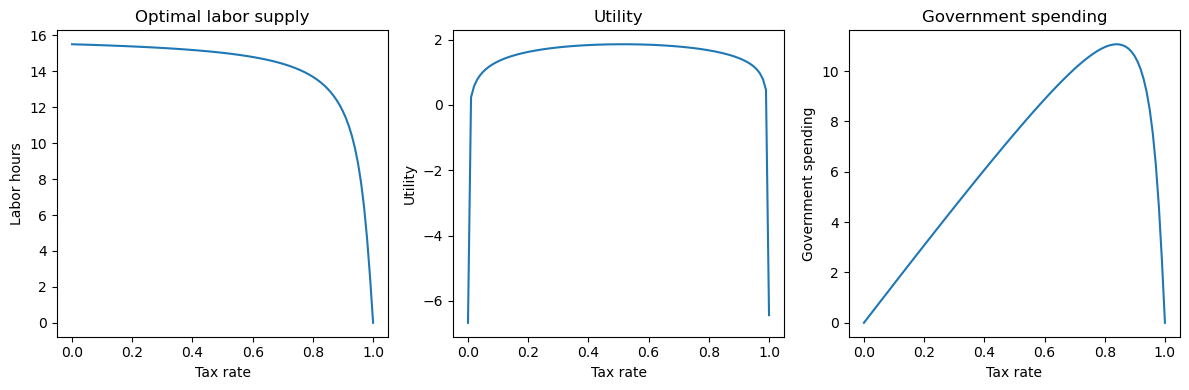

In [13]:
# Define the range of values for tau
tau_values = np.linspace(1e-08, 1-1e-08, 100)

# Define empty lists to store the results
L_values = []
V_values = []
G_values = []

# Loop over tau-values
for tau_value in tau_values:
    # Substitute tau with the current value in each equation
    solution_eq_tau = solution_eq.subs(tau, tau_value)
    gov_tau = gov.subs(tau, tau_value)
    utility_tau = utility.subs(tau, tau_value)
    
    # Evaluate the expressions numerically using the updated values of L, V, and G
    L_value = N(solution_eq_tau.rhs.subs({**param_values}).evalf())
    G_value = N(gov_tau.rhs.subs({**param_values, L: L_value}).evalf())
    V_value = N(utility_tau.rhs.subs({**param_values, L: L_value, G: G_value}).evalf())
    
    L_values.append(L_value)
    V_values.append(V_value)
    G_values.append(G_value)

# Create three separate plots
plt.figure(figsize=(12, 4))  # Adjust the figsize as desired

# Plot for Labor hours (L)
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('Tax rate')
plt.ylabel('Labor hours')
plt.title('Optimal labor supply')

# Plot for Utility (V)
plt.subplot(1, 3, 2)
plt.plot(tau_values, V_values)
plt.xlabel('Tax rate')
plt.ylabel('Utility')
plt.title('Utility')

# Plot for Government budget (G)
plt.subplot(1, 3, 3)
plt.plot(tau_values, G_values)
plt.xlabel('Tax rate')
plt.ylabel('Government spending')
plt.title('Government spending')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


**Labor Supply:** \
We see that labor supply is monotonosly decreasing in the tax rate. As taxes increase it is always optimal for the agent to consume less of the private good as this is substituted by government spending as taxes increase. 

**Utility:** \
As we standard preferences, where the public and private good are both necessary goods for the agent, we see that utility has an infinitely high slope for $\tau \approx 0$. This is because the marginal utility of government goods are really high when they spending is close to zero. Very quickly the graph evens out. This is because $\alpha = 0.5$ in our case which assigns equal weights to private and government spending in determining utility for a given level of spending.

**Government budget:** \
The last graph represents the Laffer Curve, which shows that government spending has one unique max for a level of $\tau \approx 0.85$. This is not coinciding with the maximum level of utility for the worker.  

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [22]:
# Create an instance of the q1 class
instance_q1 = q1.q1(tau)

# Call the optimize_tau_and_print method
instance_q1.optimize_tau_and_print_cobbdoug()

Optimal tau is: 0.51
Worker utility at the socially optimal tax rate is: 1.86


/Users/sisselandersen/Desktop/IPNA/projects-2023-bpr871/bpr871_eksamen/Q1.py:58: RuntimeWarning: divide by zero encountered in log
  V = -L_expr**2 * self.par.nu / 2 + np.log(G_expr**(1 - self.par.alpha) * (L_expr * self.par.w * (1 - tau) + self.par.kappa)**self.par.alpha)


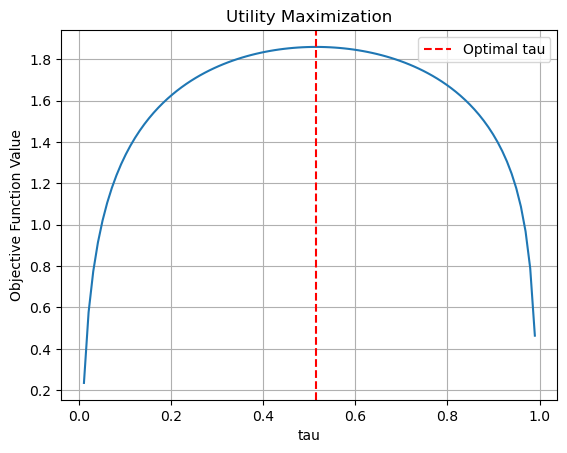

In [23]:
# Calling the plot
instance_q1.illustrate_optimal_tau_cobbdoug()

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

We will now solve the problem using our optimal tax rate but for a more genereal utility function. This general specification will be our objective for optimization. We will solve wrt. L and then find the value for G using this. We can do this because G is monotonously increasing in L as seen in this expression: 

$$G = \tau w L^{\star}((1-\tau)w,G)$$

This means that a max for L will also be a max for G.

In [25]:
# Solution for parameters in Set 1:
# Fixing tau at the optimal value obtained in previous question 
instance_q1.par1.tau = instance_q1.optimal_tau

# Call the optimize_tau_and_print_ces method
instance_q1.optimize_and_print_ces(par='par1', var='L_w')

Optimal L: 0.81
Optimal w: 1.2849401436411929e+19
Objective function value: 0.04
Optimal G: 5.357479234098318e+18


In [27]:
# Solution for parameters in Set 2:
# Fixing tau at the optimal value obtained in previous question 
instance_q1.par2.tau = instance_q1.optimal_tau

# Call the optimize_tau_and_print_ces method
instance_q1.optimize_and_print_ces(par='par2',var='L_w')

Optimal L: 0.3
Optimal w: 2.2906236462727158e+18
Objective function value: 2.0
Optimal G: 2.970507100034308e+17


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [28]:
# Solution for parameters in Set 1:
# Fixing tau at the optimal value obtained in previous question 
instance_q1.par1.tau = instance_q1.optimal_tau

# Call the optimize_tau_and_print_ces method
instance_q1.optimize_and_print_ces(par='par1', var='L_w_tau')

Optimal L: 0.72
Optimal w: 6.282045537765015e+16
Objective function value: 0.04
Optimal G: 1.122565598238571e+16


In [29]:
# Solution for parameters in Set 2:
# Fixing tau at the optimal value obtained in previous question 
instance_q1.par1.tau = instance_q1.optimal_tau

# Call the optimize_tau_and_print_ces method
instance_q1.optimize_and_print_ces(par='par2', var='L_w')

Optimal L: 0.4
Optimal w: 7.899861616739031e+18
Objective function value: 2.0
Optimal G: 1.6382627994971325e+18


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here